# [PCS3635] Análise de Dados

In [276]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

## Funções Utilitárias

In [277]:
def get_percentage_str(fraction: float) -> str:
    """Converts an fraction in to a percentage

    Args:
        fraction (float): _description_

    Returns:
        str: _description_
    
    Examples:
        >>> get_percentage_str(0.01537)
        54.23 %
        
        >>> get_percentage_str(0.5672434)
        56.72 %
    """
    percentage_str = 100*fraction
    percentage_str = f'{percentage_str:.2f}%'
    
    return percentage_str

In [278]:
df = pd.read_csv('encoded_data.csv')

## Descrição Básica do Dataframe 

In [279]:
df.head()

,date,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6,PA_7,PA_8,PA_8_1,...,PS_4_2,PS_4_3,PS_4_4,PS_4_5,PS_5,PS_6,PS_7_1,PS_7_2,PS_7_3,PS_8
0,22/04/2024 15:22:50,1,4,8.0,12.0,4,3,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,2.0,2.0,1.0,1.0,-5.0,1.0,2.0,1.0,0.0,NaN
1,22/04/2024 15:23:42,1,1,12.0,40.0,4,1,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,3.0,2.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,O fato de LabDig exigir mais tempo que o norma...
2,22/04/2024 15:24:48,2,4,8.0,9.0,2,1,2,Falta de tempo para o EP de [PCS3616] Sistemas...,0.0,...,3.0,3.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN
3,22/04/2024 15:29:14,2,4,6.0,30.0,4,3,4,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,4.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,"A matéria em si foi exigente, foi puxada, p..."
4,22/04/2024 15:43:26,1,5,1.0,10.0,1,1,1,NaN,0.0,...,5.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,NaN


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31 non-null     object 
 1   PA_1     31 non-null     int64  
 2   PA_2     31 non-null     int64  
 3   PA_3     29 non-null     float64
 4   PA_4     28 non-null     float64
 5   PA_5     31 non-null     int64  
 6   PA_6     31 non-null     int64  
 7   PA_7     31 non-null     int64  
 8   PA_8     29 non-null     object 
 9   PA_8_1   27 non-null     float64
 10  PA_8_2   31 non-null     int64  
 11  PA_8_3   31 non-null     int64  
 12  PA_8_4   31 non-null     int64  
 13  PA_8_5   30 non-null     float64
 14  PA_8_6   31 non-null     int64  
 15  PA_8_7   31 non-null     int64  
 16  PA_8_8   31 non-null     int64  
 17  PA_8_9   31 non-null     int64  
 18  PA_9     28 non-null     float64
 19  PA_10    31 non-null     int64  
 20  PA_11_1  29 non-null     float64
 21  PA_11_2  29 non-nu

In [281]:
df.shape

(31, 53)

## Configuração das Figuras

In [293]:
# if this variable is True, when the notebook is fully executed, all the figures will be replaced
# by the new figures of this notebook
save_all_figures = False

In [283]:
fig_default_size = (8, 6)
fig_default_color = 'darkblue'
top_bar_text_offset = 0.5

fig_2_subplots_default_size = (12, 8)

## Pesquisa Acadêmica

### PA_1
De qual turma você faz parte?<br>
- (a) Segunda-Feira<br>
- (b) Quarta-Feira

In [284]:
PA_1 = df['PA_1']

# separation by groups
monday_df = df[df['PA_1'] == 1]
wednesday_df = df[df['PA_1'] == 2]

PA_1.shape, monday_df.shape, wednesday_df.shape

((31,), (11, 53), (20, 53))

In [285]:
# total number of students per group
monday_total_n = 38
wednesday_total_n = 27

# total number of students that answered the research per group
monday_total_n_answered = monday_df.shape[0]
wednesday_total_n_answered = wednesday_df.shape[0]

# n answers / n students per group
monday_fraction_answered = monday_total_n_answered/monday_total_n
wednesday_fraction_answered = wednesday_total_n_answered/wednesday_total_n

# n answers / n students per group in percentage
monday_fraction_answered_percentage = 100*monday_fraction_answered
wednesday_fraction_answered_percentage = 100*wednesday_fraction_answered

groups = {
    'monday_total_n': monday_total_n,
    'wednesday_total_n': wednesday_total_n,
    'monday_total_n_answered': monday_total_n_answered,
    'wednesday_total_n_answered': wednesday_total_n_answered,
    'monday_fraction_answered': monday_fraction_answered,
    'wednesday_fraction_answered': wednesday_fraction_answered,
    'monday_fraction_answered_percentage': monday_fraction_answered_percentage,
    'wednesday_fraction_answered_percentage': wednesday_fraction_answered_percentage
}

groups

{'monday_total_n': 38,
 'wednesday_total_n': 27,
 'monday_total_n_answered': 11,
 'wednesday_total_n_answered': 20,
 'monday_fraction_answered': 0.2894736842105263,
 'wednesday_fraction_answered': 0.7407407407407407,
 'monday_fraction_answered_percentage': 28.947368421052634,
 'wednesday_fraction_answered_percentage': 74.07407407407408}

In [286]:
# resume
PA_1_resume = {
    'turma': ['segunda', 'quarta'],
    'total de alunos': [groups['monday_total_n'], groups['wednesday_total_n']],
    'quantidade de respostas': [groups['monday_total_n_answered'], groups['wednesday_total_n_answered']],
    'quantidade de respostas (%)': [groups['monday_fraction_answered_percentage'], groups['wednesday_fraction_answered_percentage']]
}

PA_1_resume_table = pd.DataFrame(PA_1_resume)

PA_1_resume_table

,turma,total de alunos,quantidade de respostas,quantidade de respostas (%)
0,monday,38,11,28.947368
1,wednesday,27,20,74.074074


### PA_2
A disciplina possuiu dois créditos de trabalho (3h20/semana). O tempo gasto por você com a disciplina, em período fora de sala de aula, ficou dentro desse limite?
- (a) Foi muito abaixo desse limite
- (b) Foi abaixo do limite
- (c) Foi adequado
- (d) Foi acima desse limite
- (e) Foi muito acima do limite

In [287]:
PA_2 = df['PA_2']
PA_2_monday = monday_df['PA_2']
PA_2_wednesday = wednesday_df['PA_2']

PA_2.shape, PA_2_monday.shape, PA_2_wednesday.shape

((31,), (11,), (20,))

In [288]:
PA_2_classes = [1, 2, 3, 4, 5]

# index mapping
PA_2_categories_mapping = {
    1: 'muito abaixo',
    2: 'abaixo',
    3: 'adequado', 
    4: 'acima',
    5: 'muito acima'
}

# categories
PA_2_categories = [PA_2_categories_mapping[PA_2_class] for PA_2_class in PA_2_classes]

# counting categories
PA_2_counting = PA_2.value_counts()
PA_2_monday_counting = PA_2_monday.value_counts()
PA_2_wednesday_counting = PA_2_wednesday.value_counts()

# n = quantity of answers per dataframe
PA_2_n_answers = PA_2.shape[0]
PA_2_monday_n_answers = PA_2_monday.shape[0]
PA_2_wednesday_n_answers = PA_2_wednesday.shape[0]

# filling with 0 non observed categories
PA_2_counting = PA_2_counting.reindex(PA_2_classes, fill_value=0)
PA_2_monday_counting = PA_2_monday_counting.reindex(PA_2_classes, fill_value=0)
PA_2_wednesday_counting = PA_2_wednesday_counting.reindex(PA_2_classes, fill_value=0)

# casting in numpy arrays
PA_2_counting = np.array(PA_2_counting)
PA_2_monday_counting = np.array(PA_2_monday_counting)
PA_2_wednesday_counting = np.array(PA_2_wednesday_counting)

# resume
print(f'PA_2_counting\nn_answers: {PA_2_n_answers}\narray: {PA_2_counting}\n')
print(f'PA_2_monday_counting\nn_answers: {PA_2_monday_n_answers}\narray: {PA_2_monday_counting}\n')
print(f'PA_2_wednesday_counting\nn_answers: {PA_2_wednesday_n_answers}\narray: {PA_2_wednesday_counting}\n')

PA_2_counting
n_answers: 31
array: [ 1  0  0 13 17]

PA_2_monday_counting
n_answers: 11
array: [1 0 0 5 5]

PA_2_wednesday_counting
n_answers: 20
array: [ 0  0  0  8 12]



In [289]:
# frequencies calculation
PA_2_frequency = PA_2_counting/sum(PA_2_counting)
PA_2_monday_frequency = PA_2_monday_counting/sum(PA_2_monday_counting)
PA_2_wednesday_frequency = PA_2_wednesday_counting/sum(PA_2_wednesday_counting)

print(f'general: {PA_2_frequency}\nmonday: {PA_2_monday_frequency}\nwednesday: {PA_2_wednesday_frequency}')

general: [0.03225806 0.         0.         0.41935484 0.5483871 ]
monday: [0.09090909 0.         0.         0.45454545 0.45454545]
wednesday: [0.  0.  0.  0.4 0.6]


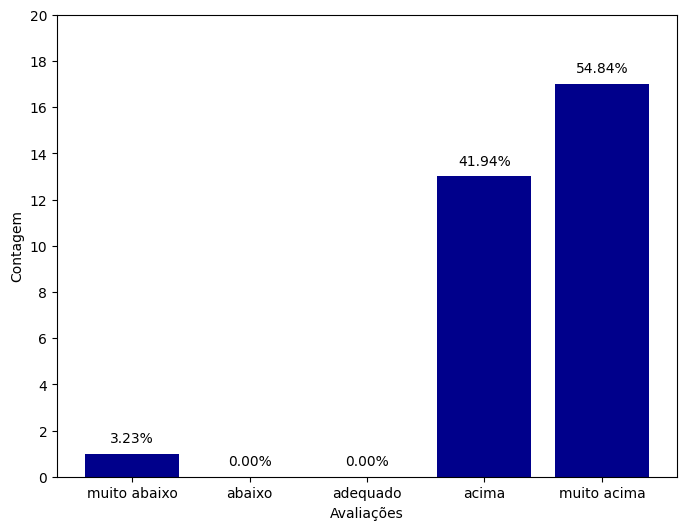

In [290]:
# plotting PA_2 for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 20)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_general_classes')
    
# showing the figure
plt.show()

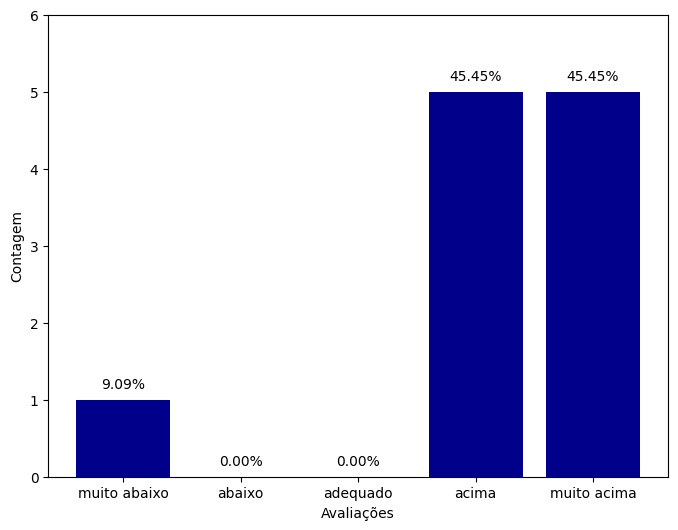

In [291]:
# plotting PA_2 for general counting in monday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_monday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 6)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_monday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_monday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_monday_classes')
    
# showing the figure
plt.show()

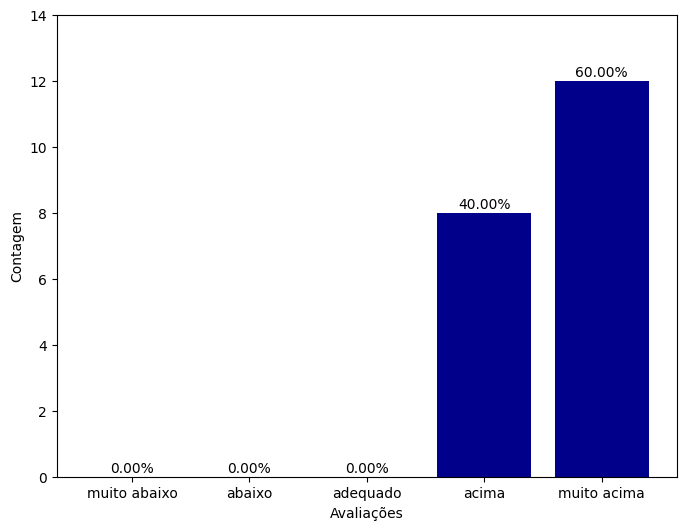

In [292]:
# plotting PA_2 for general counting in wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_wednesday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 14)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_wednesday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_wednesday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_wednesday_classes')
    
# showing the figure
plt.show()

Binarização dos dados

In [304]:
# binarization of the data

# general
PA_2_bin_counting_under = sum(PA_2_counting[0:2])
PA_2_bin_counting_over = sum(PA_2_counting[3:5])
PA_2_bin_counting = np.array([PA_2_bin_counting_under, PA_2_bin_counting_over])

# monday
PA_2_monday_bin_counting_under = sum(PA_2_monday_counting[0:2])
PA_2_monday_bin_counting_over = sum(PA_2_monday_counting[3:5])
PA_2_monday_bin_counting = np.array([PA_2_monday_bin_counting_under, PA_2_monday_bin_counting_over])

# wednesday
PA_2_wednesday_bin_counting_under = sum(PA_2_wednesday_counting[0:2])
PA_2_wednesday_bin_counting_over = sum(PA_2_wednesday_counting[3:5])
PA_2_wednesday_bin_counting = np.array([PA_2_wednesday_bin_counting_under, PA_2_wednesday_bin_counting_over])

PA_2_bin_counting, PA_2_monday_bin_counting, PA_2_wednesday_bin_counting

(array([ 1, 30]), array([ 1, 10]), array([ 0, 20]))

In [306]:
# frequency couting for the binary data
PA_2_bin_frequency = PA_2_bin_counting/sum(PA_2_bin_counting)
PA_2_monday_bin_frequency = PA_2_monday_bin_counting/sum(PA_2_monday_bin_counting)
PA_2_wednesday_bin_frequency = PA_2_wednesday_bin_counting/sum(PA_2_wednesday_bin_counting)

PA_2_bin_frequency, PA_2_monday_bin_frequency, PA_2_wednesday_bin_frequency

(array([0.03225806, 0.96774194]),
 array([0.09090909, 0.90909091]),
 array([0., 1.]))

In [314]:
# resume

PA_2_resume = {
    'geral (contagem)': PA_2_bin_counting,
    'segunda (contagem)': PA_2_monday_bin_counting,
    'quarta (contagem)': PA_2_wednesday_bin_counting,
    'geral (frequência)': PA_2_bin_frequency, 
    'segunda (frequência)': PA_2_monday_bin_frequency, 
    'quarta (frequência)': PA_2_wednesday_bin_frequency
}

PA_2_resume_table = pd.DataFrame(PA_2_resume)

PA_2_resume_table

,geral (contagem),segunda (contagem),quarta (contagem),geral (frequência),segunda (frequência),quarta (frequência)
0,1,1,0,0.032258,0.090909,0.0
1,30,10,20,0.967742,0.909091,1.0


### PA_3

### PA_4

### PA_5

### PA_6

### PA_7

### PA_8

### PA_9

### PA_10

### PA_11

### PA_12

## Pesquisa de Saúde

### PS_1

### PS_1

### PS_2

### PS_3

### PS_4

### PS_5

### PS_6

### PS_7

### PS_8